/tmp/ipython-input-1821020762.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1821020762.py:48: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pand

<Axes: title={'center': 'Stock Price Prediction'}, xlabel='Date'>

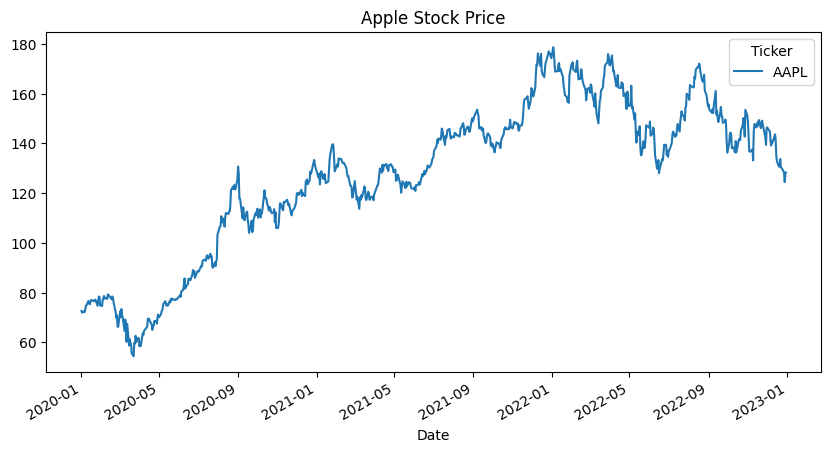

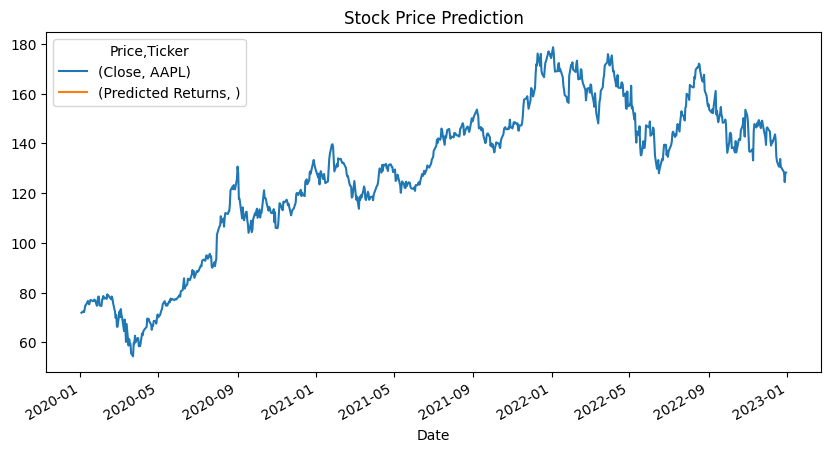

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from hpelm import ELM
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Collection
symbol = 'AAPL'  # Example: Apple Inc.
data = yf.download(symbol, start='2020-01-01', end='2023-01-01')
data['Close'].plot(title='Apple Stock Price', figsize=(10, 5))

# Step 2: Data Preprocessing
# Use the 'Close' price and prepare the dataset
data['Returns'] = data['Close'].pct_change()  # Calculate daily returns
data = data.dropna()

# Prepare the input (X) and output (y)
window_size = 5  # Use the past 5 days to predict the next
X = []
y = []
for i in range(window_size, len(data)):
    X.append(data['Returns'].iloc[i-window_size:i].values)
    y.append(data['Returns'].iloc[i])  # Predict the return of the next day

X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Normalize data
X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

# Create a separate scaler for the target variable
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)


# Step 3: Create and train the ELM model
model = ELM(X_scaled.shape[1], 1)  # Number of input neurons, 1 output neuron
model.add_neurons(10, 'sigm')  # Add 10 sigmoid neurons
model.train(X_scaled, y_scaled)

# Step 4: Make predictions
predictions_scaled = model.predict(X_scaled)

# Denormalize the predictions for interpretation using the y_scaler
predictions_rescaled = y_scaler.inverse_transform(predictions_scaled)
data['Predicted Returns'] = np.nan
data['Predicted Returns'].iloc[window_size:] = predictions_rescaled.squeeze()

data[['Close', 'Predicted Returns']].plot(title='Stock Price Prediction', figsize=(10, 5))